In [2]:

import pandas as pd
stocks = pd.read_csv('/Users/user/Downloads/NFLX-2.csv', index_col= 'Date')

In [4]:
stocks.index = pd.to_datetime(stocks.index)

In [5]:
stocks.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-08-14,0.775714,0.833571,0.771429,0.833571,0.833571,4047400
2002-08-15,0.837143,0.910714,0.832857,0.882857,0.882857,3263400
2002-08-16,0.892857,0.924286,0.857143,0.912857,0.912857,1828400
2002-08-19,0.925000,0.984286,0.917857,0.982143,0.982143,2074800
2002-08-20,0.985000,0.993571,0.921429,0.946429,0.946429,2539600


<AxesSubplot:xlabel='Date'>

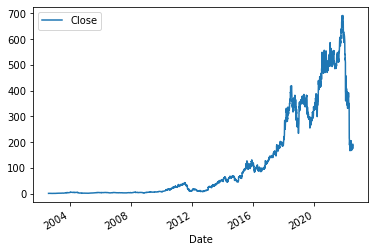

In [6]:
stocks.plot.line(y='Close', use_index= True)

In [9]:
stocks['Tomorrow'] = stocks['Close'].shift(-1)

In [12]:
stocks['Target'] = (stocks['Tomorrow']> stocks['Close']).astype(int)

In [13]:
stocks


,Open,High,Low,Close,Adj Close,Volume,Tomrrow,Tomorrow,Target
Date,,,,,,,,,
2002-08-14,0.775714,0.833571,0.771429,0.833571,0.833571,4047400,0.882857,0.882857,1
2002-08-15,0.837143,0.910714,0.832857,0.882857,0.882857,3263400,0.912857,0.912857,1
2002-08-16,0.892857,0.924286,0.857143,0.912857,0.912857,1828400,0.982143,0.982143,1
2002-08-19,0.925000,0.984286,0.917857,0.982143,0.982143,2074800,0.946429,0.946429,0
2002-08-20,0.985000,0.993571,0.921429,0.946429,0.946429,2539600,0.968571,0.968571,1
...,...,...,...,...,...,...,...,...,...
2022-07-12,177.330002,179.779999,173.419998,174.449997,174.449997,6845300,176.559998,176.559998,1
2022-07-13,170.500000,179.179993,169.699997,176.559998,176.559998,12734400,174.779999,174.779999,0
2022-07-14,175.559998,177.520004,171.820007,174.779999,174.779999,9039500,189.110001,189.110001,1


In [14]:
del stocks['Tomorrow']

In [15]:
stocks

,Open,High,Low,Close,Adj Close,Volume,Tomrrow,Target
Date,,,,,,,,
2002-08-14,0.775714,0.833571,0.771429,0.833571,0.833571,4047400,0.882857,1
2002-08-15,0.837143,0.910714,0.832857,0.882857,0.882857,3263400,0.912857,1
2002-08-16,0.892857,0.924286,0.857143,0.912857,0.912857,1828400,0.982143,1
2002-08-19,0.925000,0.984286,0.917857,0.982143,0.982143,2074800,0.946429,0
2002-08-20,0.985000,0.993571,0.921429,0.946429,0.946429,2539600,0.968571,1
...,...,...,...,...,...,...,...,...
2022-07-12,177.330002,179.779999,173.419998,174.449997,174.449997,6845300,176.559998,1
2022-07-13,170.500000,179.179993,169.699997,176.559998,176.559998,12734400,174.779999,0
2022-07-14,175.559998,177.520004,171.820007,174.779999,174.779999,9039500,189.110001,1


In [16]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, min_samples_split=100, random_state=1)

train = stocks.iloc[:-100]
test = stocks.iloc[-100:]

predictors = ["Close", "Volume", "Open", "High", "Low"]
model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

In [17]:
from sklearn.metrics import precision_score

preds = model.predict(test[predictors])
preds = pd.Series(preds, index=test.index)
precision_score(test["Target"], preds)

0.4423076923076923

<AxesSubplot:xlabel='Date'>

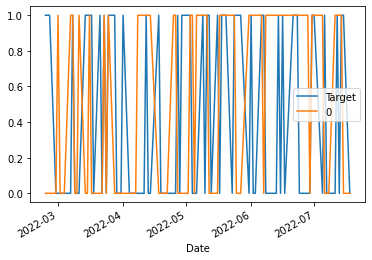

In [18]:
combined = pd.concat([test["Target"], preds], axis=1)
combined.plot()

In [19]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict(test[predictors])
    preds = pd.Series(preds, index=test.index, name="Predictions")
    return combined

In [32]:
def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []

    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        predictions = predict(train, test, predictors, model)
        all_predictions.append(predictions)
    
    return pd.concat(all_predictions)

In [33]:
predictions = backtest(stocks, model, predictors)

In [34]:
predictions

,Target,0
Date,,
2022-02-23,1,0
2022-02-24,1,0
2022-02-25,1,0
2022-02-28,0,0
2022-03-01,0,1
...,...,...
2022-07-12,1,1
2022-07-13,0,1
2022-07-14,1,1


In [35]:
predictions[0].value_counts()

1    572
0    528
Name: 0, dtype: int64

In [37]:
precision_score(predictions["Target"], predictions[0])

0.4423076923076923

In [38]:
predictions["Target"].value_counts() / predictions.shape[0]

0    0.56
1    0.44
Name: Target, dtype: float64

In [39]:
horizons = [2,5,60,250,1000]
new_predictors = []

for horizon in horizons:
    rolling_averages = stocks.rolling(horizon).mean()
    
    ratio_column = f"Close_Ratio_{horizon}"
    stocks[ratio_column] = stocks["Close"] / rolling_averages["Close"]
    
    trend_column = f"Trend_{horizon}"
    stocks[trend_column] = stocks.shift(1).rolling(horizon).sum()["Target"]
    
    new_predictors+= [ratio_column, trend_column]

In [40]:
stocks

,Open,High,Low,Close,Adj Close,Volume,Tomrrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,,
2002-08-14,0.775714,0.833571,0.771429,0.833571,0.833571,4047400,0.882857,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-08-15,0.837143,0.910714,0.832857,0.882857,0.882857,3263400,0.912857,1,1.028714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-08-16,0.892857,0.924286,0.857143,0.912857,0.912857,1828400,0.982143,1,1.016706,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-08-19,0.925000,0.984286,0.917857,0.982143,0.982143,2074800,0.946429,0,1.036563,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002-08-20,0.985000,0.993571,0.921429,0.946429,0.946429,2539600,0.968571,1,0.981482,1.0,1.038239,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-07-12,177.330002,179.779999,173.419998,174.449997,174.449997,6845300,176.559998,1,0.991785,0.0,0.956310,1.0,0.890852,27.0,0.389020,117.0,0.421774,502.0
2022-07-13,170.500000,179.179993,169.699997,176.559998,176.559998,12734400,174.779999,0,1.006011,1.0,0.975901,2.0,0.914435,28.0,0.395016,118.0,0.427067,502.0
2022-07-14,175.559998,177.520004,171.820007,174.779999,174.779999,9039500,189.110001,1,0.994934,1.0,0.981789,1.0,0.918141,28.0,0.392282,118.0,0.422949,502.0


In [41]:
stocks = stocks.dropna()

In [42]:
model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

In [43]:
def predict(train, test, predictors, model):
    model.fit(train[predictors], train["Target"])
    preds = model.predict_proba(test[predictors])[:,1]
    preds[preds >=.6] = 1
    preds[preds <.6] = 0
    preds = pd.Series(preds, index=test.index, name="Predictions")
    combined = pd.concat([test["Target"], preds], axis=1)
    return combined

In [45]:
predictions = backtest(stocks, model, new_predictors)

In [46]:
predictions

,Target,Predictions
Date,,
2016-07-11,1,0.0
2016-07-12,1,0.0
2016-07-13,1,0.0
2016-07-14,1,0.0
2016-07-15,1,0.0
...,...,...
2022-07-11,0,0.0
2022-07-12,1,0.0
2022-07-13,0,0.0


In [47]:
predictions["Predictions"].value_counts()

0.0    1355
1.0     160
Name: Predictions, dtype: int64

In [48]:
precision_score(predictions["Target"], predictions["Predictions"])

0.5375

In [49]:
predictions["Target"].value_counts() / predictions.shape[0]

1    0.510891
0    0.489109
Name: Target, dtype: float64